# Notebook to compare reconstructed vectors and targets

In [9]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os

In [10]:
# Load reconstructed vectors

recons_vecs_path = "./estimated_vectors/regressor:mlpwithscheduler_fmritype:betas_rois:WB_sub01_blip/"

recons_vecs_train = np.load(recons_vecs_path + "preds_train.npy")
recons_vecs_test = np.load(recons_vecs_path + "preds_test.npy")

print("Reconstructed vectors shape: ", recons_vecs_train.shape, recons_vecs_test.shape)

Reconstructed vectors shape:  (1000, 173568) (102, 173568)


In [11]:
# Load ground truth vectors

gt_vecs_path = "./data/target_vectors/blip/"
gt_vecs_train = []
gt_vecs_test = []
train_range = range(1, 1001)
test_range = range(1001, 1103)
for v in train_range:
    gt_vecs_train.append(np.load(gt_vecs_path + f'{v:04d}.npy'))

for v in test_range:
    gt_vecs_test.append(np.load(gt_vecs_path + f'{v:04d}.npy'))

gt_vecs_train = np.array(gt_vecs_train)
gt_vecs_test = np.array(gt_vecs_test)
print("gt_vecs_train.shape", gt_vecs_train.shape)
print("gt_vecs_test.shape", gt_vecs_test.shape)


gt_vecs_train.shape (1000, 173568)
gt_vecs_test.shape (102, 173568)


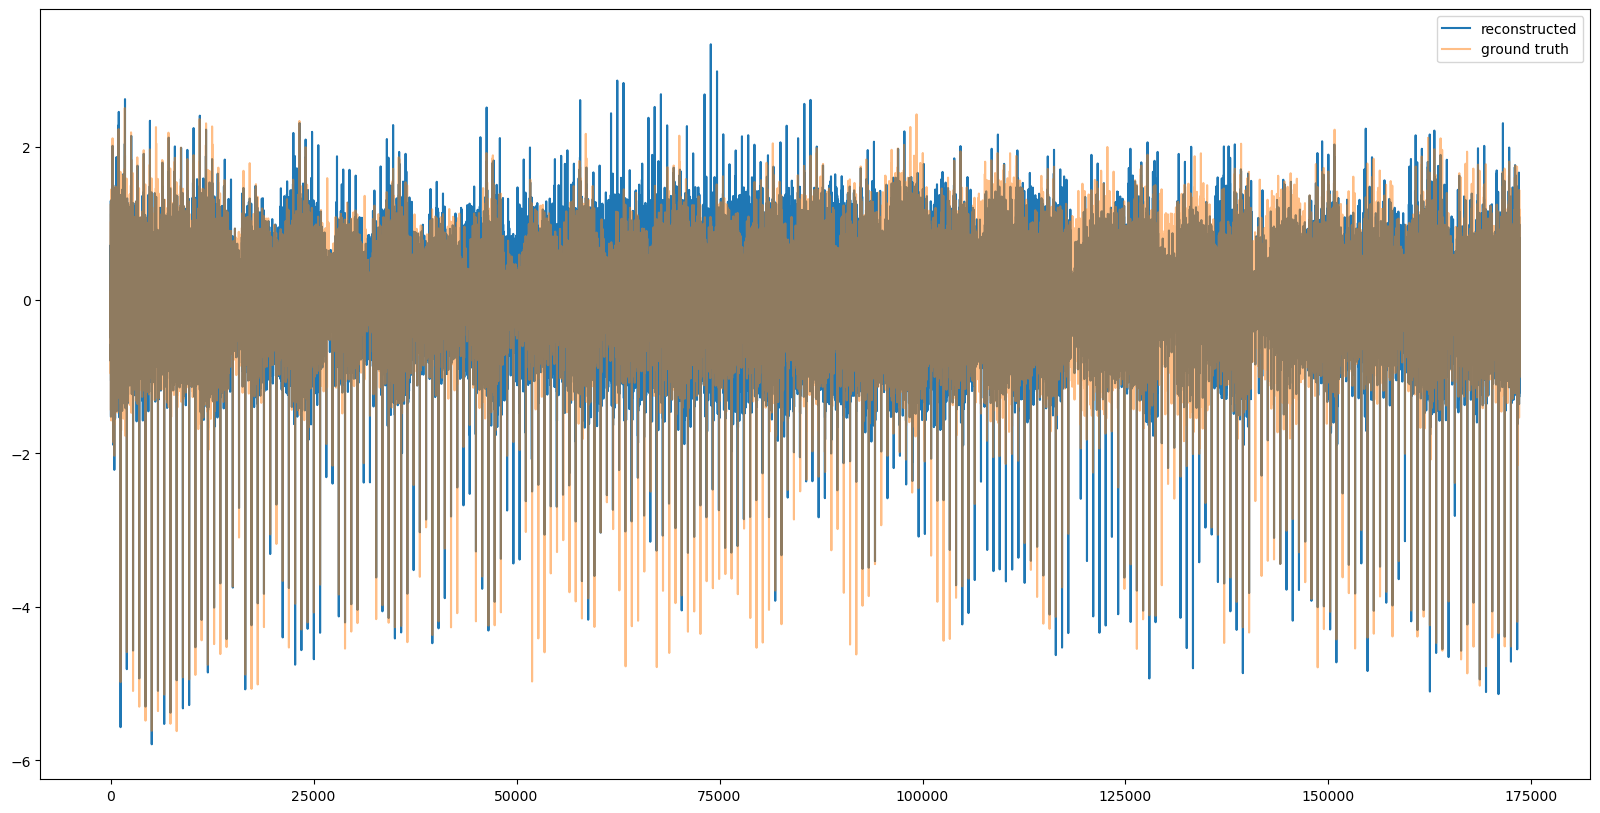

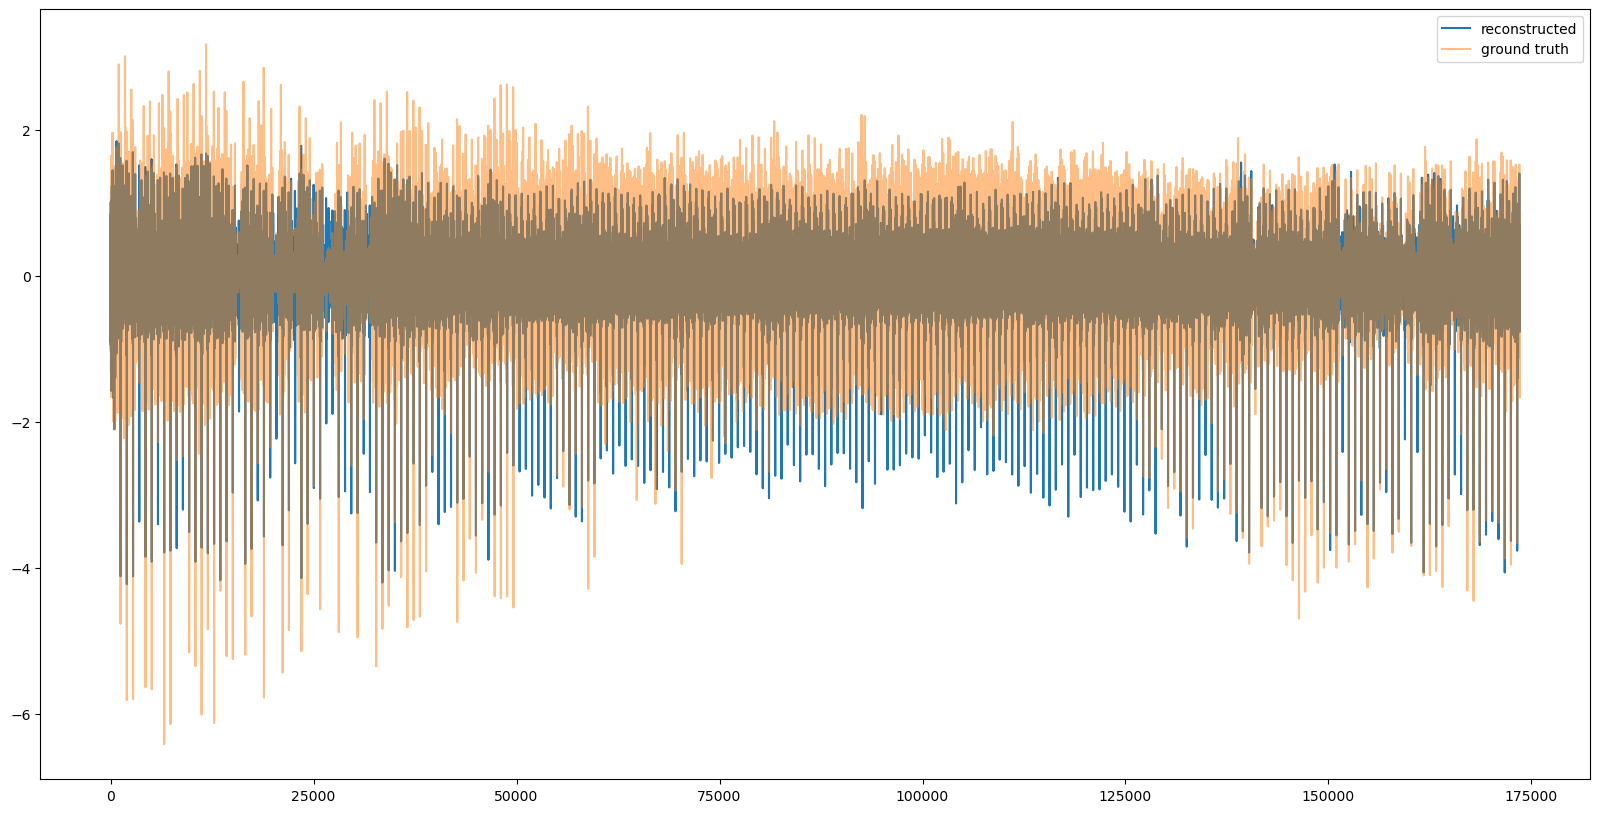

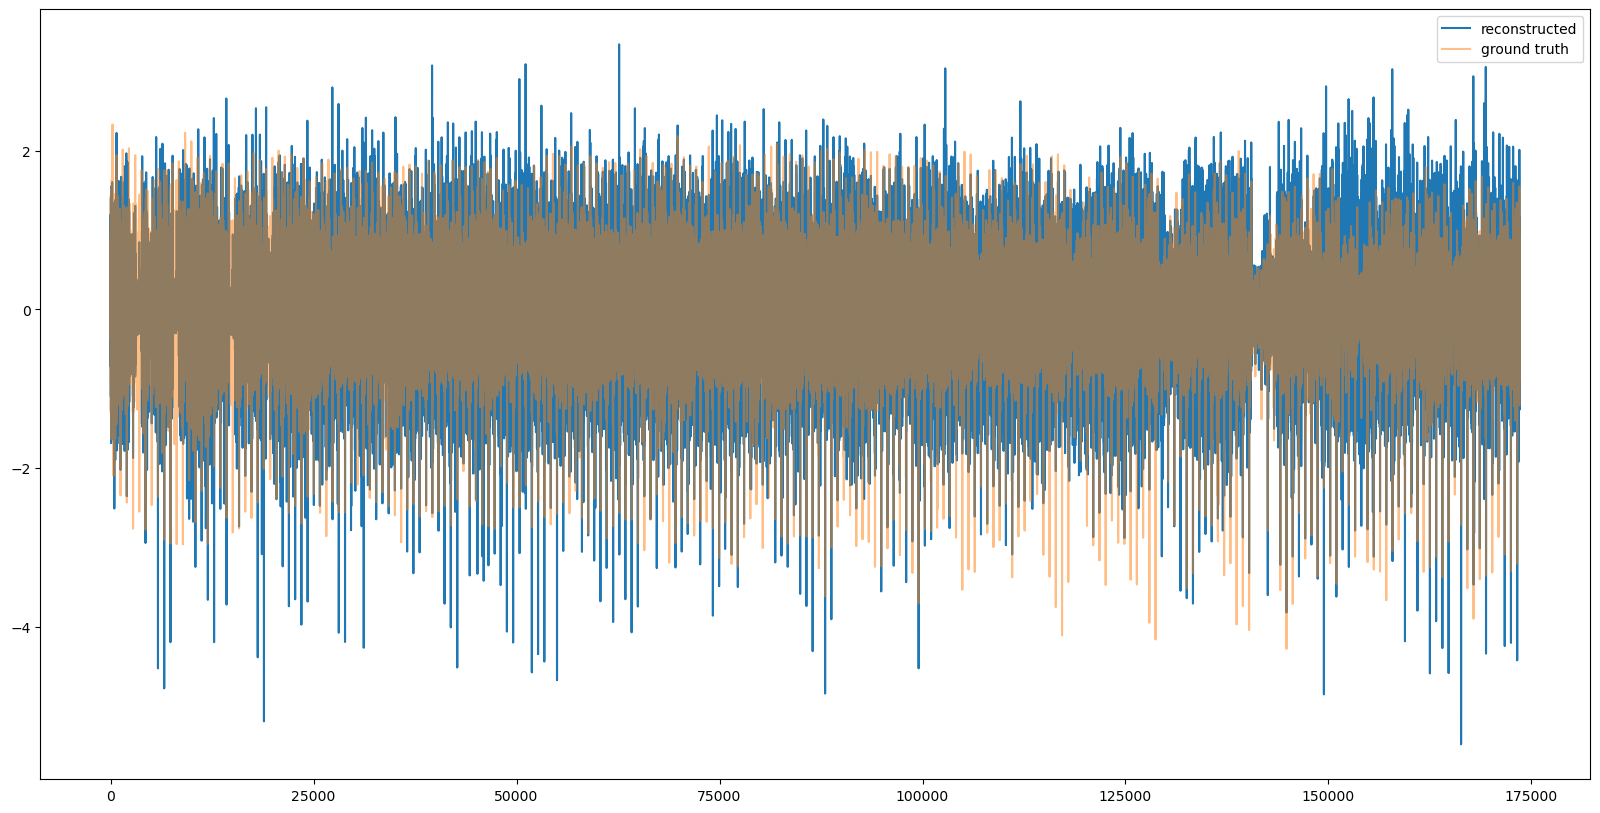

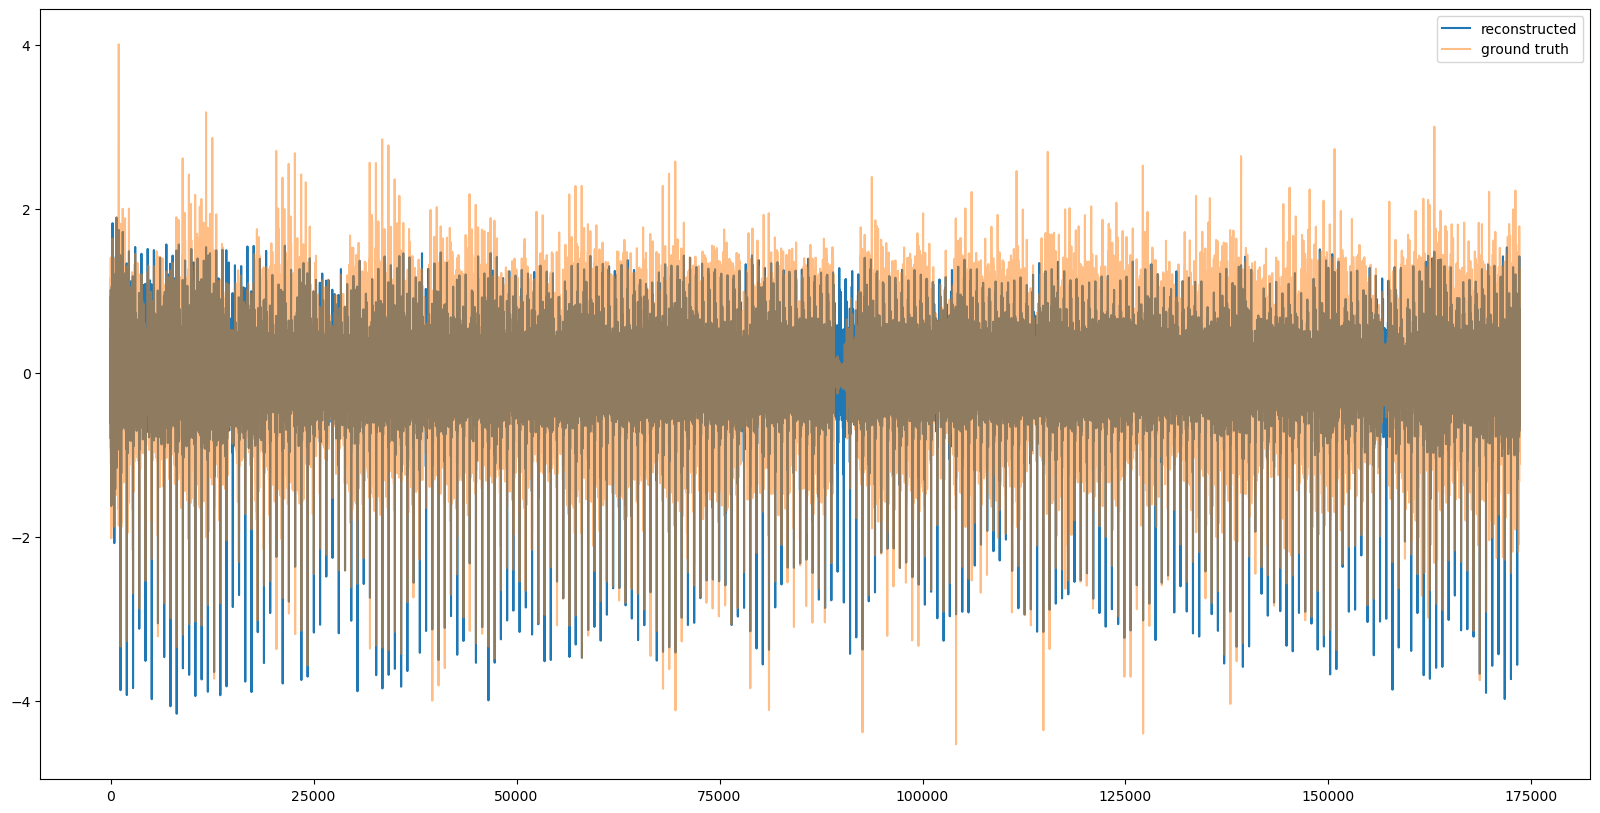

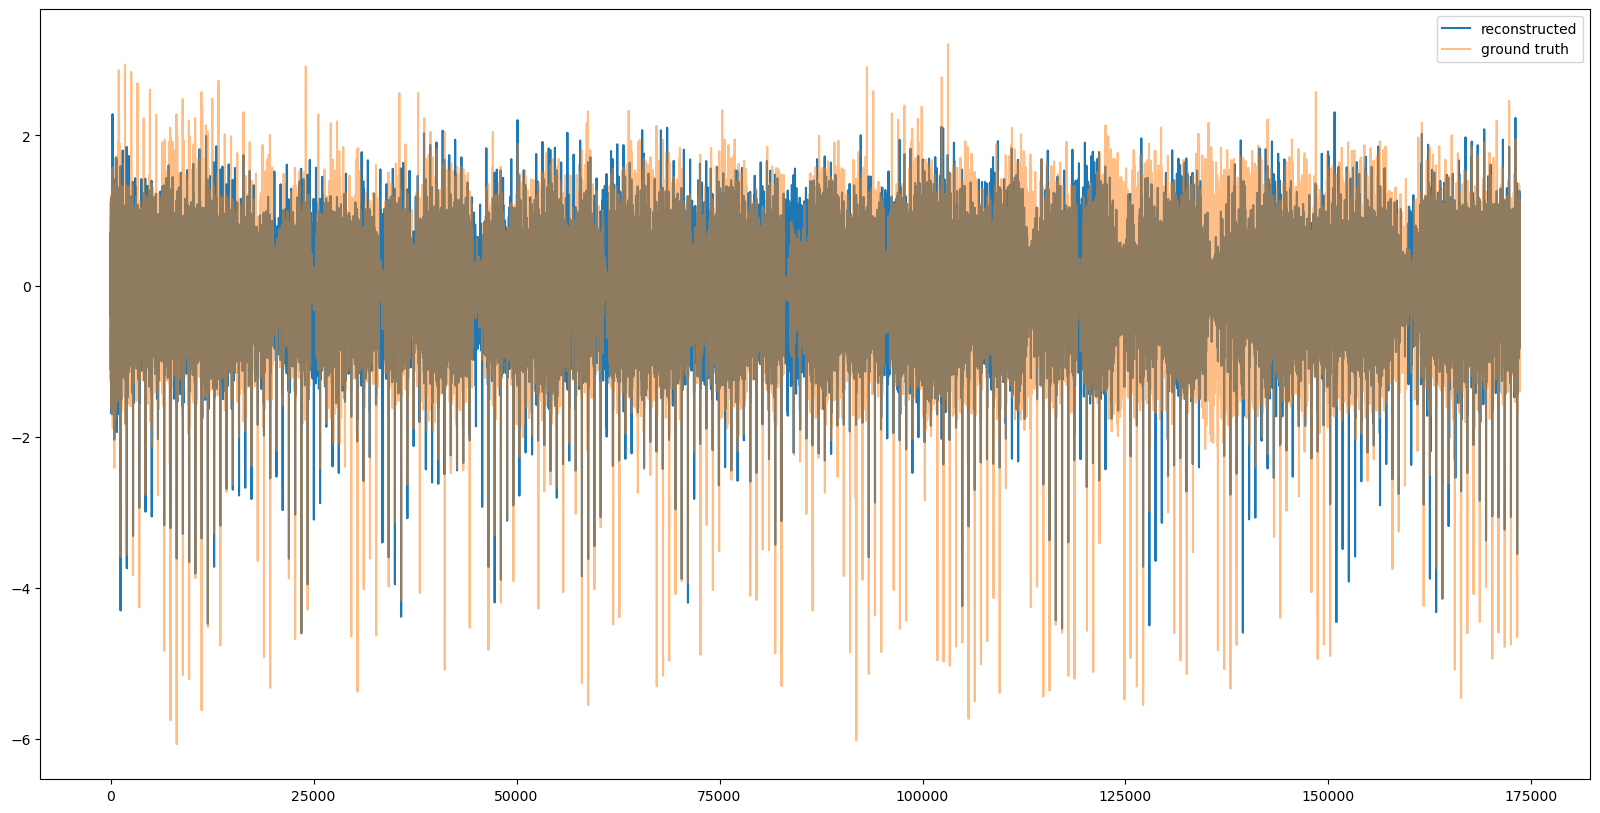

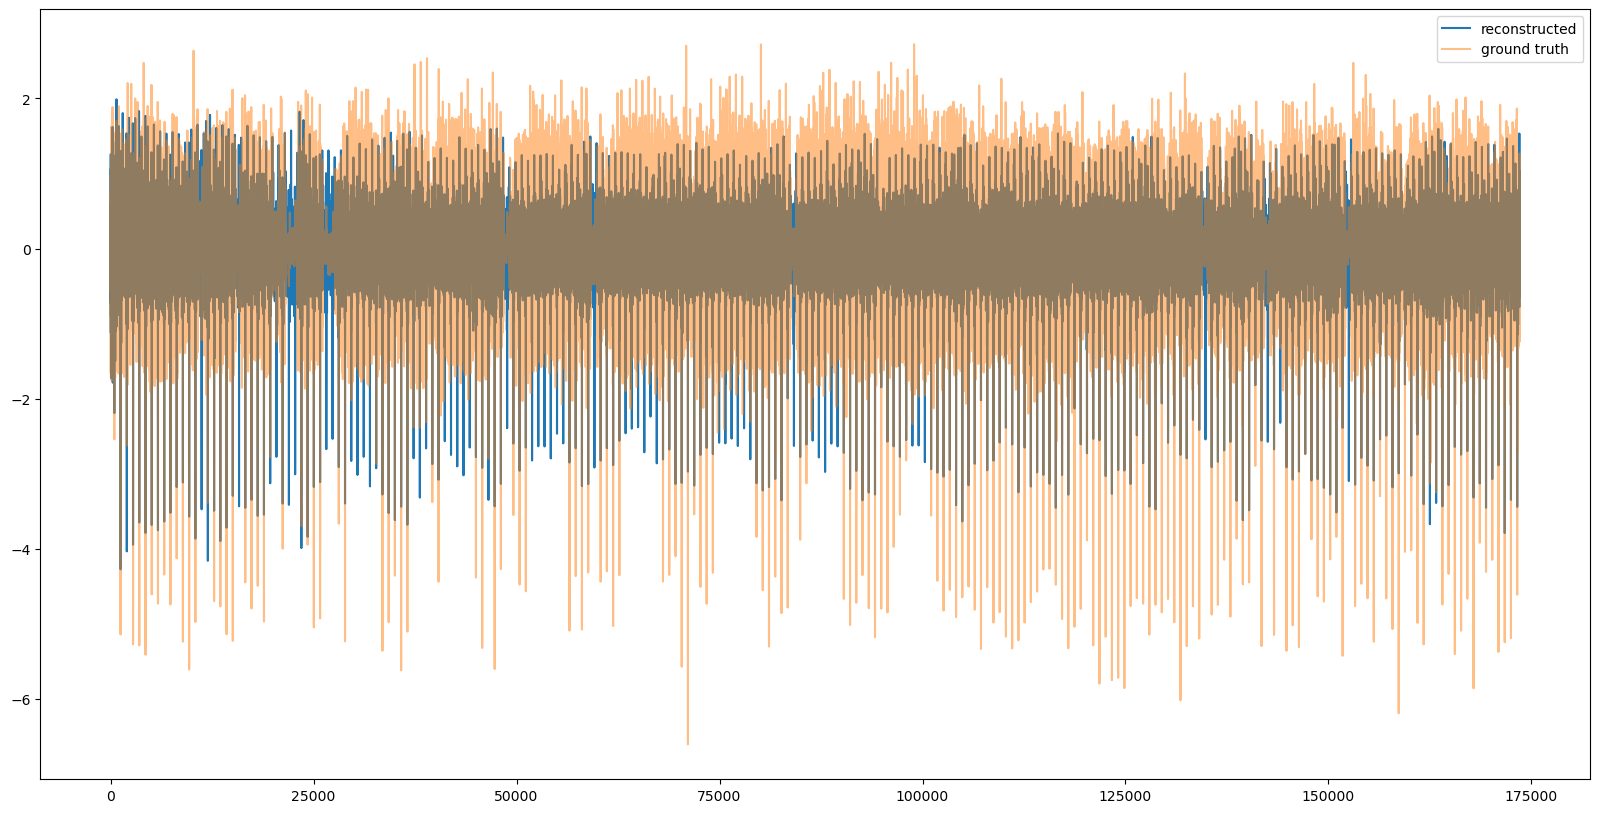

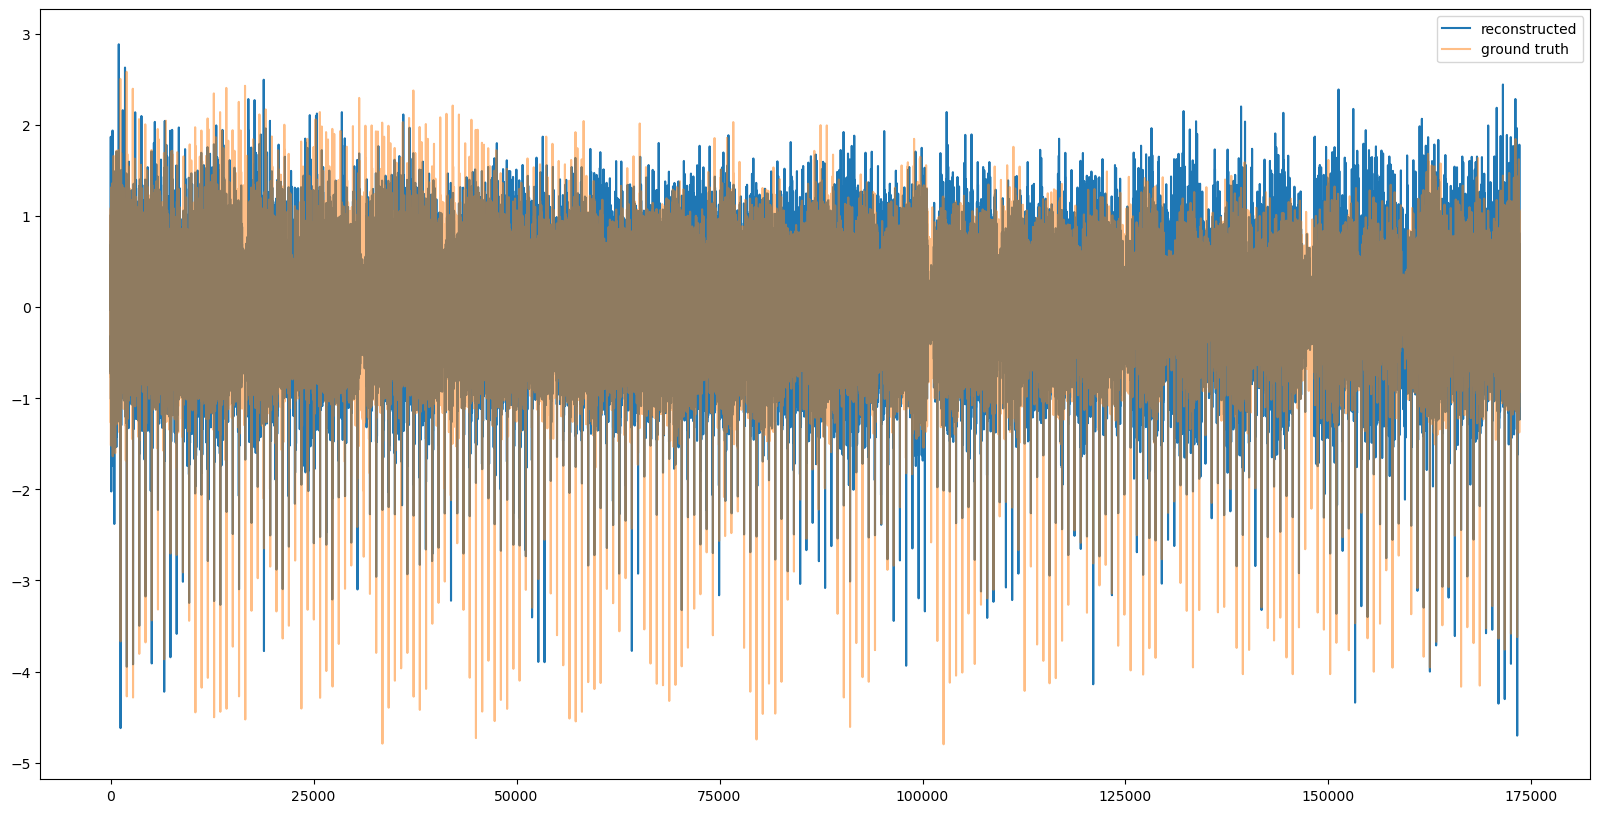

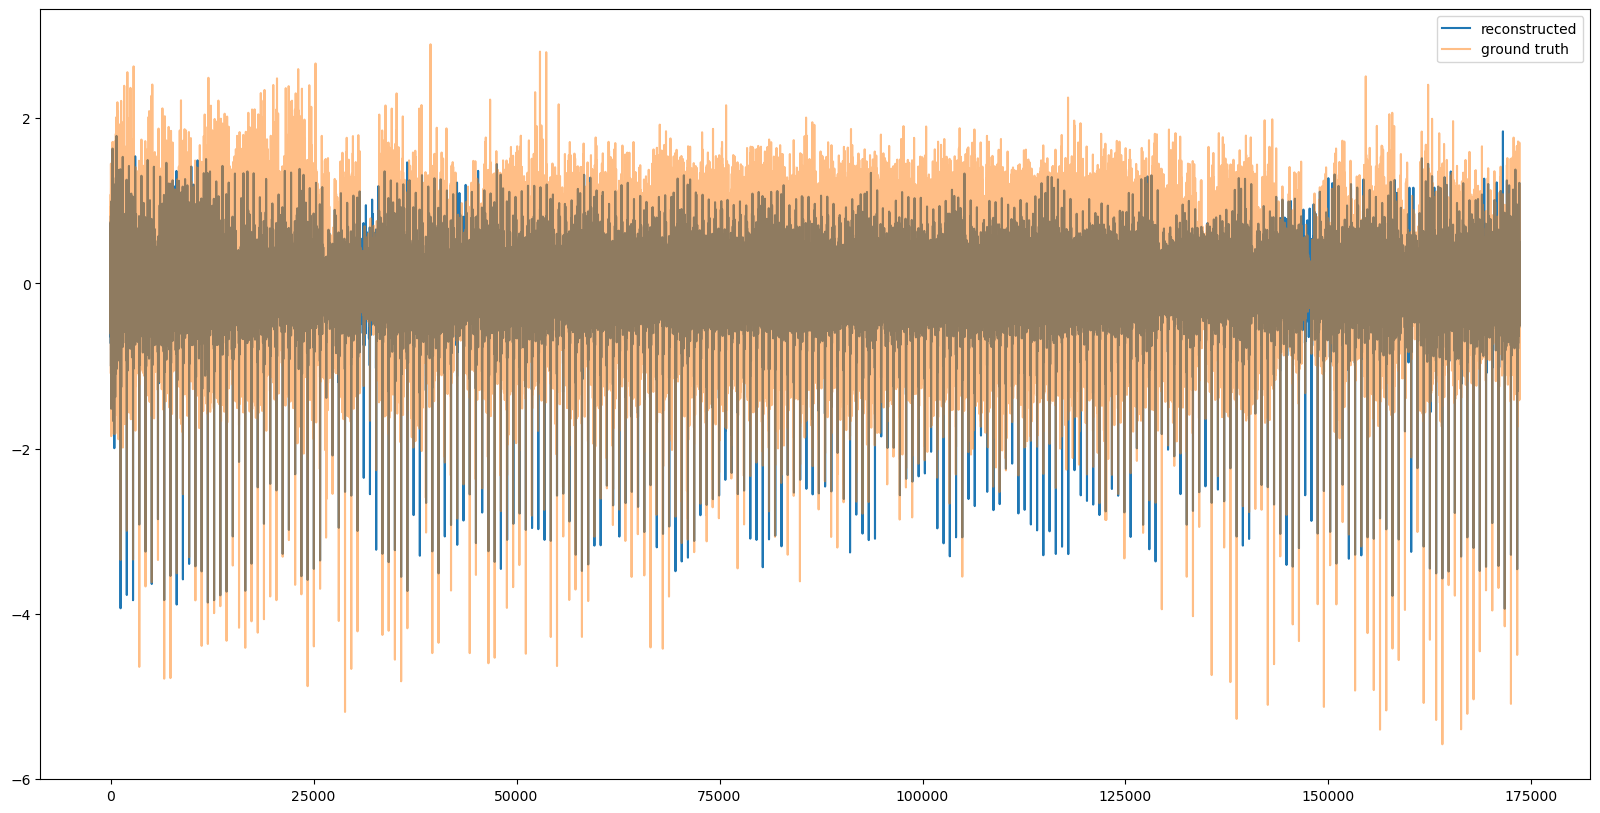

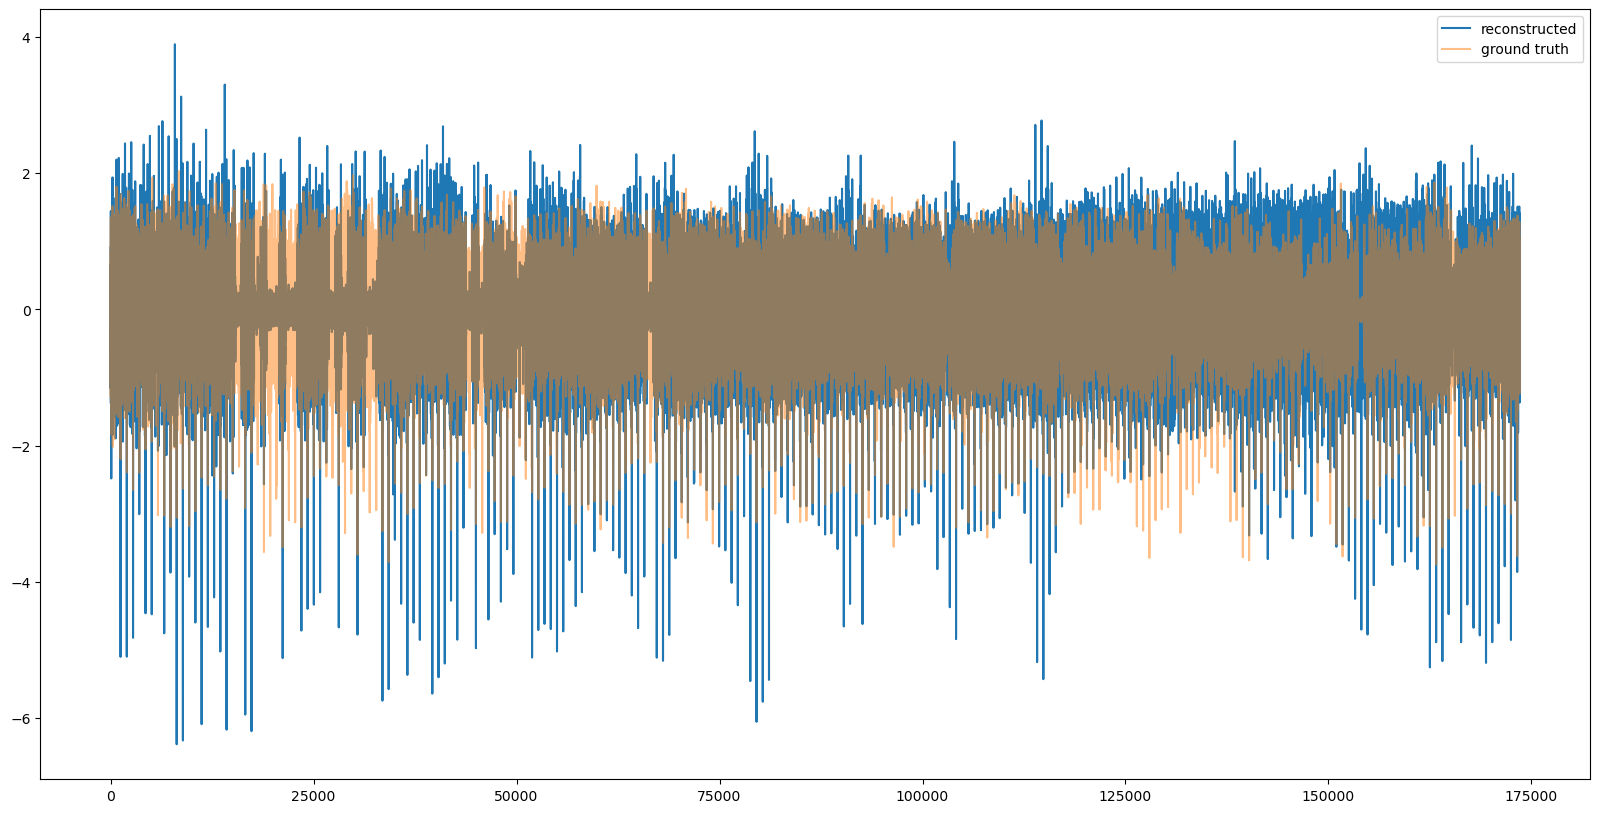

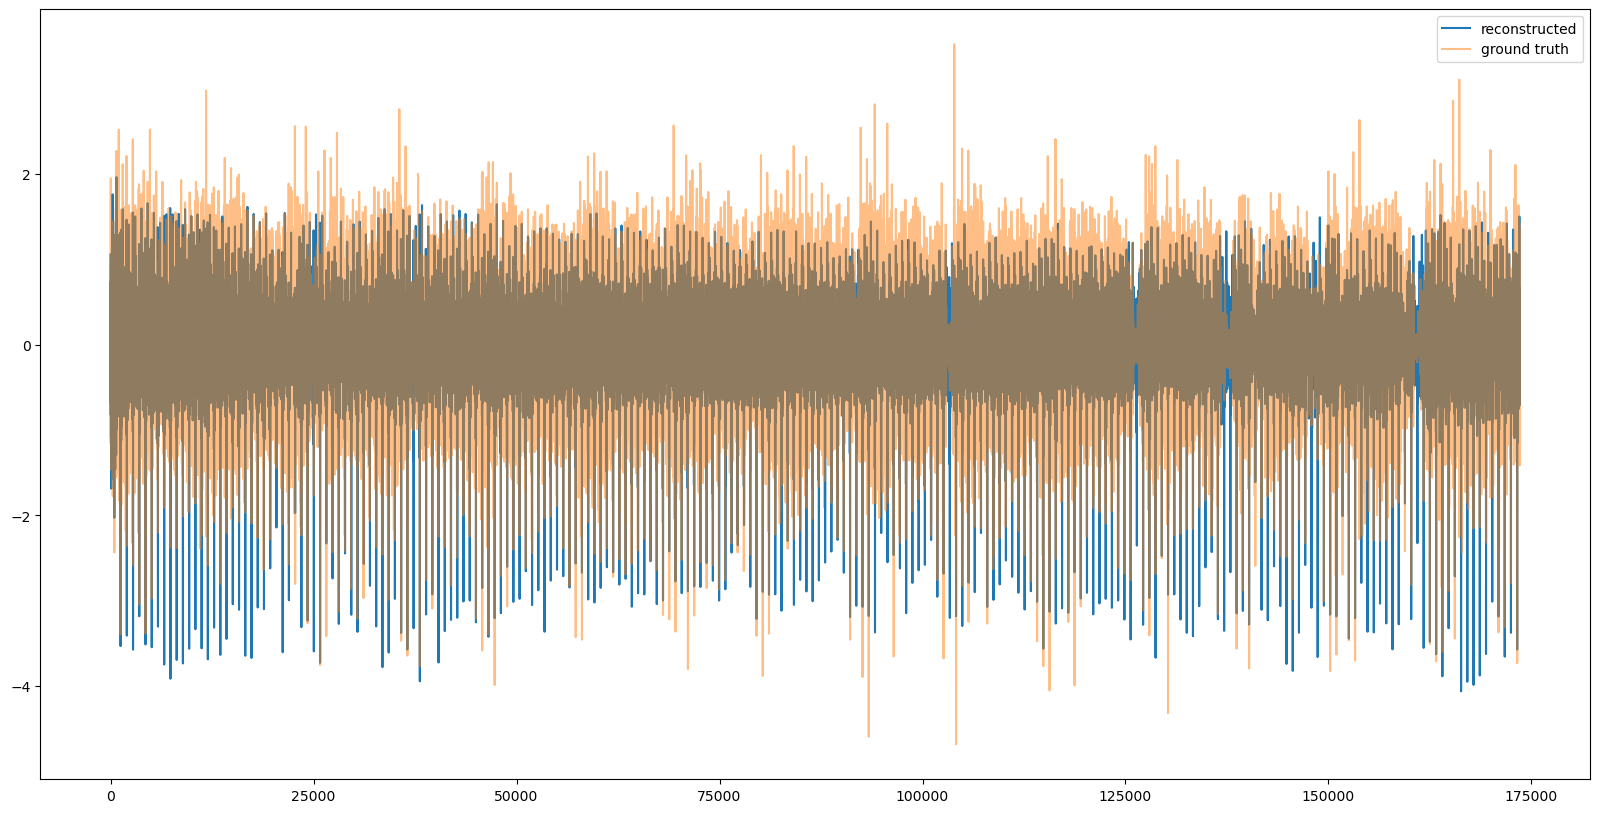

KeyboardInterrupt: 

In [19]:
# Compare vectors  

def compare_vectors(recons_vecs, gt_vecs, n):
    plt.figure(figsize=(20,10))
    plt.plot(recons_vecs[n], label="reconstructed")
    plt.plot(gt_vecs[n], label="ground truth", alpha=0.5)
    plt.legend()
    plt.show()

for i in range(10):
    compare_vectors(recons_vecs_train, gt_vecs_train, i)
    compare_vectors(recons_vecs_test, gt_vecs_test, i)



In [3]:
# Compare Takagi vectors 
# Suspicion: his "subjfeat" obtained through the make_subjstim.py file don't change across features

import numpy as np

feat_path = '../StableDiffusionReconstruction/nsdfeat/subjfeat/'

# Load c feats
feattype = 'ave'
featname = 'c'
subj = '01'
subset = 'te'
filename = feat_path + 'subj' + subj + '_' + feattype + '_' + featname + '_' + subset + '.npy'

c_feat = np.load(filename)
print("loaded c subjfeat with shape: ", c_feat.shape)

# load init_latent feats
featname = 'init_latent'
filename = feat_path + 'subj' + subj + '_' + feattype + '_' + featname + '_' + subset + '.npy'
z_feat = np.load(filename)
print("loaded z subjfeat with shape: ", z_feat.shape)


loaded c subjfeat with shape:  (982, 59136)
loaded z subjfeat with shape:  (982, 6400)


In [6]:
# saving Y_te for a quick test
import numpy as np

Y_te = np.load('../StableDiffusionReconstruction/nsdfeat/subjfeat/subj01_ave_blip_te.npy').astype("float32")
Y_te = Y_te.reshape(Y_te.shape[0], -1)
print(Y_te.shape)
roi = ['early', 'ventral', 'midventral', 'midlateral', 'lateral', 'parietal']
np.save(f'../StableDiffusionReconstruction/decoded/subj01/subj01_{"_".join(roi)}_gt_blip.npy',Y_te)


(982, 173568)


In [8]:
from download_data import download_betas_glmsingle_impulse

download_betas_glmsingle_impulse(subjects_to_download=list(range(2,11)))

UnboundLocalError: local variable 'subject' referenced before assignment